# Workshop 1

Materiał
    
1. Praktyczny Machine Learning,
2. Dane Treningowe i Testowe,
3. Klasyfikacja i etykiety,
4. Przygotowanie danych,
5. Korzystanie z ChatGPT.

## Praktyczny ML

### Drivetrain Approach

![](https://raw.githubusercontent.com/fastai/fastbook/823b69e00aa1e1c1a45fe88bd346f11e8f89c1ff//images/drivetrain-approach.png)

Na podstawie [fastbook](https://github.com/fastai/fastbook/blob/master/02_production.ipynb)

Tak jak każdy projekt ML powienien mieć jasno określony cel, który pozwoli na jego efektywne zaimplementowanie.

### Iteracje i Tracer-bullet Development

Czyli jak najszybciej staramy się uruchomić nasz pipeline dla algorytmu, żeby:

1. Mieć punkt odniesienia dla zmian,
2. Poznać lepiej domenę,
3. Analizując przykłady danych dla których nasz algorytm się najgoszej sprawdza (największy *loss*), często wskazuje na problemy z danymi lub naszym zrozumieniem problemu.

Praca w iteracjach:

![](img/_81e65d0d-188e-4ab2-bb3f-73df0074a822.jpeg){width=20%}





Tracer-bullet:

```{mermaid}
flowchart LR
  Poczatek(Początek) --> P1(Nieznany\nProblem 1)
    
  P1 --> P2(Nieznany\nProblem 2)
  P2 --> P3(Nieznany\nProblem 3)
  P3 --> HappyPath(Happy Path)
  
  HappyPath --> KI(Kolejna Iteracja:\nRozbudowa/Patchowanie)
```


## Dane

```{mermaid}
flowchart LR
  TD(Training\nData) -- trenujemy\n/uczymy --> TM[Trenowanie\nModelu]
  VD(Validation\nData) -- czy idziemy\nw dobra strone? --> TM
  
  TM --> M(Model)
  
  M --> SM[Sprawdzenie\nModelu]
  
  
  TeD(Test\nData) -- jak sprawdza się\nna nieznanych danych --> SM
  
  SM --> Metryki(Metryki)
```

## Typy Danych

Mamy:

1. **Dane Treningowe**, czasami mówimy o danych treningowych jako dane uczące i validacyjne, czasami narzędzia, które będziemy używać będą wewnętrznie obsługiwać podział dane do trenowania i walidacji.
2. **Dane Walidacyjne**, pozwalają nam dać feedback dla algorytmu uczącego, a propos jakości wyników.
3. **Dane Testowe**, dane, które nasz algorytm nie widział i nie miał okazji się nauczyć.

## Klasyfikacja i Etykiety

Po angielsku `label`, dodatkowa informacja wyjaśniająca co wiersz danych, zestaw pikseli, lub fragment piosenki oznacza. Etykiety są tym co chcemy przewidzieć na podstawie danych, które ją reprezentują. Celem algorytmów klasyfikacji jest właśne znalezienie sposobu rozpoznania etykiety na podstawie danych wejściowych.

```{mermaid}

flowchart LR
  Dane_1(x11,x12, x13, x14) --> Etykieta_1("Label 1 (y)")
  Dane_2(x21,x22, x23, x14) --> Etykieta_1
  
  Dane_3(x31,x32, x33, x34) --> Etykieta_2("Label 2 (y)")
```

**Algorytmy klasyfikacji**

## Funkcje w popularnych biblioteki ML / DS

### scikit-learn

Na przykład bibliotek [scikit-learn](https://scikit-learn.org/stable/) dostarcza nam funkcję `train_test_split` ([dokumentacja](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

Jeśli zaleźy nam na losowym wybraniu zbiorów testowych i treningowych wystarczy:

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)
```

Jeśli chcemy się upewnić, że mamy zarówno w danych testowych oraz trenujacych reprezentacje dla każdej klasy, jeśli przygotowujemy dane do wytrenowania algorytmu do klasyfikacji:

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=22, stratify=y
)
```

Musimy upewnić się, że zarówno X i y mają reprezentantów każdej z klasy (etykiety), inaczej albo nasz model nie będzie w stanie obsłużyć danej klasy, albo nie będziemy w stanie pomierzyć efektywności naszego algorytmu.

## fastai

W przypadku [fastai](https://docs.fast.ai/data.load.html), [DataBlock](https://docs.fast.ai/data.block.html) ([dokumentacja na temat transformacji danych](https://docs.fast.ai/data.transforms.html)) daje nam logikę do wyznaczenia `X`, `y` oraz rozdzielenia danych na validacyjne i do trenowania.

```python
DataBlock(
    blocks=(TextBlock.from_df("full_text", vocab=dls_lm.vocab), CategoryBlock), # funkcje do transformacji danych
    get_x=ColReader("text"), # co jest X
    get_y=ColReader("category"), # co jest y
    splitter=ColSplitter("is_valid")) # ktore wiersze beda train, a ktore valid
```



## Praca z danymi, transformacje i feature engineering

Zauważ: zazwyczaj w pierwszej iteracji, na mniejszej ilości danych, wyprobowyjemy jeden z algorytmów, który wiemy, że może dać nam dobre wyniki. Daje nam to punkt odniesienia, dla poprawy danych czy też wypróbowywania różnych algorytmów.

### Problemy

```{mermaid}

flowchart LR
   PBW(Brakujace\nwartości) --> Problemy(Problemy z danymi)
   Dupl(Duplikaty) --> Problemy(Problemy z danymi)
   PBR(Dziwne\nreprezentacje pustych wartości) --> Problemy
   PBO(Wartości\nodstające) --> Problemy
   PBZ(Zakresy wartości\ndanych wejściowych) --> Problemy
   PB(Brak wystarczająco\nreprezentantów dla danej klasy) --> Problemy
   Bl(Błędy w danych) --> Problemy
   
```

W świecie idealnym:

- dane są kompletne, a w przypadku problemów klasyfikacji, mamy przykłady dla każdej z etykiet/klas;
- nie mamy braków, pustych wartości, dziwnych znaczników, np., NULL, null, ... itp;
- dane są w podobnych zakresach, np., 1-10, bez outlinerów.

taaaa... 

### Zagrożenia w produkcji

Warto zdawać sobie sprawę, model w produkcji wymaga od nas szczególnej uwagi, ze względu na zagrożenia:

```{mermaid}

flowchart LR
   Bias(Bias) --> Z("Zagrożenia")
   MR("model rot") --> Z
   FL("Feedback loops") --> Z
   OD("out-of-domain data") --> Z
```


Zagrożenia w produkcji:

- bias - nasz dataset może być tendencyjny, np., trenowanie rozpoznawania anglieskiego poza szkocją czy NZ
- model rot - nasze dane trenujące nie odpowiadają rzeczywistości w której model operatuje
- feedback loops - sugerujemy się obecnymi wynikami modelu w doborze danych do dotrenowania
- out-of-domain data - dane, których nie widzieliśmy nigdy wcześniej

### Rollout


Dlatego rollout nowego modelu powinien być uważnie monitorowany:

![](https://raw.githubusercontent.com/fastai/fastbook/823b69e00aa1e1c1a45fe88bd346f11e8f89c1ff//images/att_00061.png){width=30%}

## Prace z danymi

Na szczęście większość bibliotek dostarcza nam gotowe funkcję, większość bibliotek pozwala nam budować pipeline-y, które łączą z sobą wiele funkcjonalności.

### Usunięcie duplikatów

In [ ]:
import pandas as pd
import numpy as np


# Create a sample DataFrame
df = pd.DataFrame({
    'col1': ['A', 'B', 'C', 'A', 'B', 'D'],
    'col2': [1, 2, 3, 1, 2, 4]
})

# Remove duplicate rows based on col1
df = df.drop_duplicates(subset=['col1'])

# Print the new DataFrame
print(df)

  col1  col2
0    A     1
1    B     2
2    C     3
5    D     4


### Brakujące wartości

Dwie możliwości, usunięcie ich lub uzupełninie wartością, np., średnią.

#### Usunięcie wierwszy z brakującymi danymi

In [ ]:
X = pd.DataFrame({
    'col1': ['A', None, 'C', 'A', 'B', 'D'],
    'col2': [1, 2, 3, 1, 2, 4]
})

X.dropna(subset='col1')

,col1,col2
0,A,1
2,C,3
3,A,1
4,B,2
5,D,4


#### Uzupełnienie

Jakimi wartościami uzupełnimy brakujące dane to zależy od scenariusza. Załóżmy, że chcemy wziąść średnią ważoną jako wartość dla uzupełnienia braków:

In [ ]:
df = pd.DataFrame({
    'col1': ['A', 'B', 'C', 'A', 'B', 'D', 'E'],
    'col2': [1, 2, np.nan, 1, 2, 4, np.nan]
})

df

,col1,col2
0,A,1.0
1,B,2.0
2,C,NaN
3,A,1.0
4,B,2.0
5,D,4.0
6,E,NaN


In [ ]:
avg = df[df["col2"].notna()]["col2"].mean()

In [ ]:
df.loc[df["col2"].isna(), "col2"] = avg


df

,col1,col2
0,A,1.0
1,B,2.0
2,C,2.0
3,A,1.0
4,B,2.0
5,D,4.0
6,E,2.0


### Wartości odstające

Box plot jest dobrym startem. Więcej na [kaggle](https://www.kaggle.com/learn/feature-engineering).

In [ ]:
df = pd.DataFrame({
    'col1': ['A', 'B', 'C', 'A', 'B', 'D', 'E', 'F', 'G'],
    'col2': [1, 1, 2, -30, 1, 2, 4, 10, 30]
})

In [ ]:
df

,col1,col2
0,A,1
1,B,1
2,C,2
3,A,-30
4,B,1
5,D,2
6,E,4
7,F,10
8,G,30


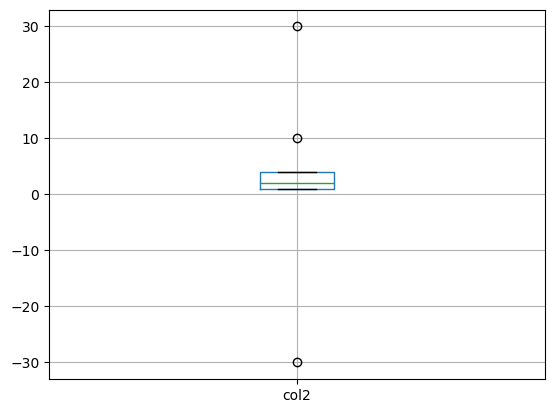

In [ ]:
import matplotlib.pyplot as plt
df.boxplot(column=["col2"])

plt.show()

### Dystrybucja danych

Na przykład, przygotowując dane dla algorytmów klasyfikacji, możemy uświadomić sobie, że nie mamy wystarczająco przykładów dla każdej z klas. 

In [ ]:
df = pd.DataFrame({
    'label': ['A', 'B', 'B', 'B', 'B', 'A', 'A', 'C', 'A'],
    'col2': [1, 1, 2, -30, 1, 2, 4, 10, 30]
})

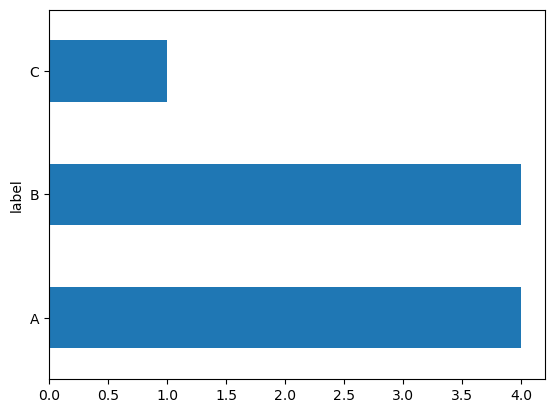

In [ ]:
df["label"].value_counts(sort=False).plot.barh()
plt.show()

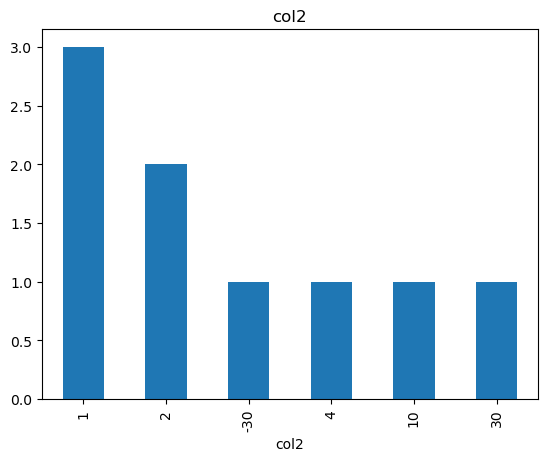

In [ ]:
import pylab as pl
from IPython import display

features = ["col2"]

i = 0
for f_name in features:
    p = df[f_name].value_counts(sort=True)
    p.plot(kind="bar").set_title(f_name)
    if i < len(features) - 1:
        display.display(pl.gcf())
    i = i + 1

plt.show()

### Data Augementation

Przykład zdjęcia samochodu, z jednego możemy wygenerowąć wiele danych treninogwych:

1. Rozciągnąć zdjęcie,
2. Obrócić,
3. Zmienić barwę zdjęcia,
4. Ukryć jakąś część obrysu samochodu.

Na przykład `fastai` ma funkcję `aug_transforms` (https://docs.fast.ai/vision.augment.html).

### Dane kategoryczne vs ciąłe

In [ ]:
df = pd.DataFrame({
    'label': ['A', 'B', 'B', 'B', 'B', 'A', 'A', 'C', 'A'],
    'col2': [1, 1, 2, -30, 1, 2, 4, 10, 30]
})

df.dtypes



label    object
col2      int64
dtype: object

In [ ]:
df["label"] = pd.Categorical(df["label"], ordered=False)

In [ ]:
df.dtypes

label    category
col2        int64
dtype: object

### Encoding danych kategorycznych

Więcej w dokumentacji [skikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). W większości przypadków dla etykiet warto wykorzystywać tranformatory od prostych takich jak `LabelEncoder`, do złożonych opartych o modele językowe (embeddings).

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(["A", "B", "B", "C", "D", "E"])

le.transform(["A", "B", "A"])

array([0, 1, 0])

In [ ]:
le.inverse_transform([0, 0, 1, 2])

array(['A', 'A', 'B', 'C'], dtype='<U1')

### Skalowanie danych ciągłych

In [ ]:
from sklearn.preprocessing import MinMaxScaler

currency_close_scaler = MinMaxScaler(feature_range=(-1, 1))

## Pipelines

Oferowane są zarówno przez [ski-learn](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html), jak i, np., [huggingface](https://huggingface.co/docs/transformers/main_classes/pipelines), pozwalają zdefiniować kolejne kroki dla przetwarzania danych w ramach jednego workflowu.

Krokami mogę być nie tylko oznaczanie danych jako kategorycznych czy ciągłym, ale również encoding oraz skalowanie.

Przykład:

```python
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SVC(gamma="auto", C=1.0, kernel="rbf"))
clf.fit(X_train, y_train.values.ravel())
```

## Korzystanie z ChatGPT


Najlepszym sposobem poznania jak budować nowe modele oraz aplikacje oparte o LLM to korzystać z najlepszych dostępnych implementacji. Ponad wszelką wątpliwość obecnie prym wiedzie ChatGPT. Dobre intro przez Jeremiego Howarda - [github.com/fastai/lm-hackers](https://github.com/fastai/lm-hackers).

## Materiały dodatkowe

- [Google ML Foundational Course](https://developers.google.com/machine-learning/foundational-courses)